In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
# next time we can look at statistics  - measures of central tendency and measures of dispersion
#- Measure of central tendency  - calculate/ some measures of dispersion
# popular graphs/plots ( check for each type of data the best plot for it)
#  - one numeric column -  scatter (swarm plot),histogram, box plot
#  - two numeric columns  - scatter plot or box plots
#  - one numeric and one categorical # a bar chart or a pie chart
#  - multivariae - stacked plots and more advanced plot  - faceting and they include multiple geometric features
#  - time series data  - line plot
# how to create plots in Matplotlib.pyplot and seaboirn
# a real dataset and go through the analysis  - evaluate and visualize
# hypothesis and statistical tests

In [3]:
import os
os.listdir()
df = pd.read_csv("titanic.csv")

# univariate analysis

In [6]:
print(df.shape)
print(display(df.head(3)))
print(df.info())

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# print the statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


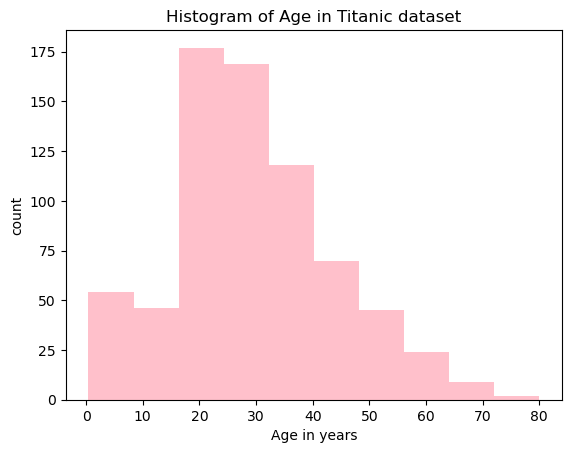

c:\Users\kkama\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



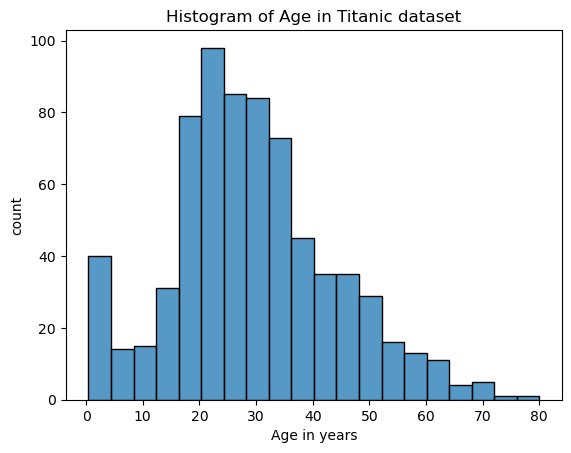

In [18]:
# univariate visualization (numeric - )
# histogram (matplotlib)

plt.figure()
plt.hist(df['Age'],color = "pink")
plt.title("Histogram of Age in Titanic dataset")
plt.xlabel("Age in years")
plt.ylabel('count')
plt.show()
# histogram (seaborn)
plt.figure()
sns.histplot(df['Age'])
plt.title("Histogram of Age in Titanic dataset")
plt.xlabel("Age in years")
plt.ylabel('count')
plt.show()
# plotly_express
px.histogram(df['Age'],template = 'none',title = "Histogram of Age in Titanic dataset")

# Boxplot

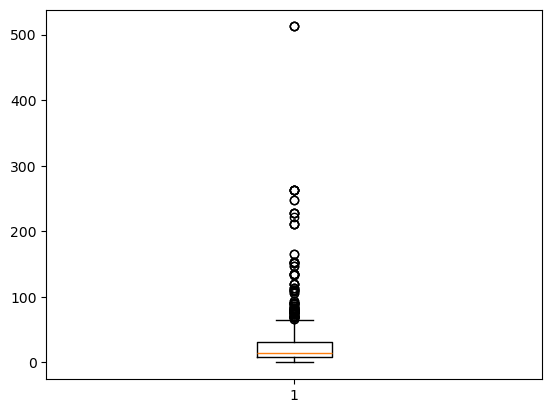

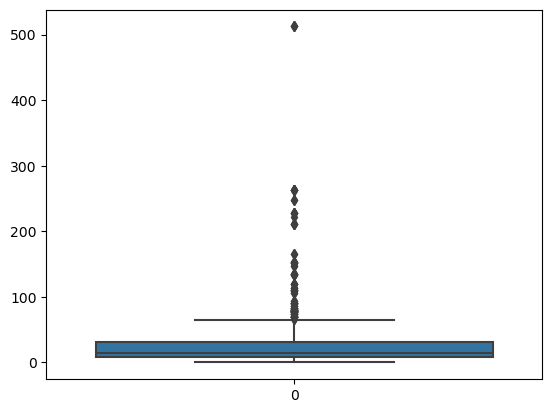

In [25]:
# The boxplot
plt.figure()
plt.boxplot(df['Fare'])
plt.show()
# seaborn
plt.figure()
sns.boxplot(df['Fare'])
plt.show()

px.box(df['Fare'],template = 'none')

In [31]:
px.histogram(df['Fare'],marginal = 'box',title = "Box and hist plot",template = 'none')

In [32]:
# categorical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


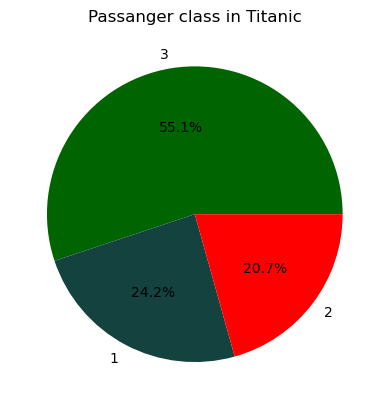

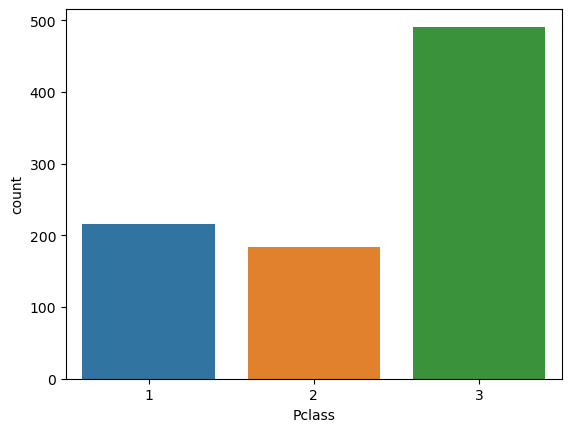

In [51]:
y = df['Pclass'].value_counts().reset_index()
# matplotlib
plt.figure()
plt.pie(y['count'],labels = y['Pclass'],autopct='%1.1f%%',colors = ['darkgreen',"#13423f","red"])
plt.title("Passanger class in Titanic")
plt.show()

# seaborn 
sns.barplot(data = y,x = 'Pclass',y = 'count')
# plotly-express
px.pie(y,names = 'Pclass',values = 'count')

In [39]:
y

,Pclass,count
0,3,491
1,1,216
2,2,184


# Bivariate visualizations

<Axes: xlabel='Survived', ylabel='Age'>

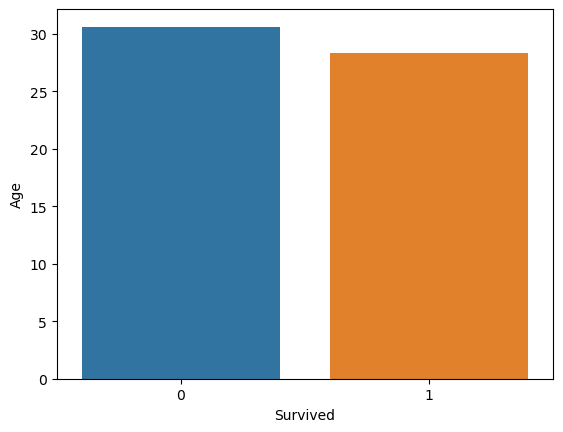

In [59]:
# one numeric and one categorical
y = df.groupby(['Survived'])['Age'].agg('mean').reset_index()
# plt.barh(y['Survived'],y['Age'],label = ['survived','died'])
sns.barplot(y,x = 'Survived',y = 'Age')
# two categorical 

# two numeric


<Axes: >

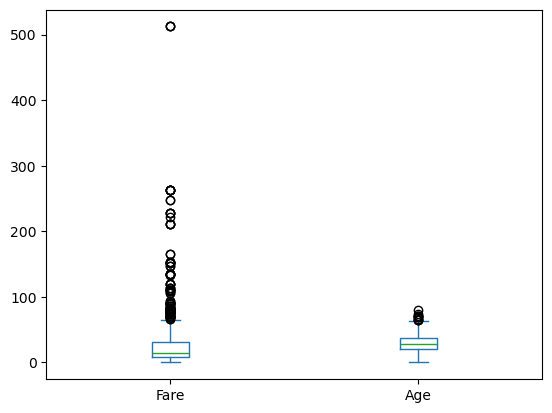

In [62]:
# two numeric
df[['Fare','Age']].plot(kind = 'box')

<Axes: xlabel='Age', ylabel='Fare'>

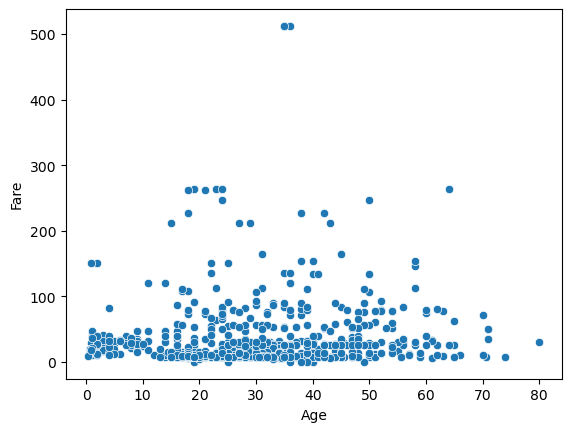

In [64]:
# scatter plot
sns.scatterplot(data = df,y = 'Fare',x = 'Age')

# Multivariate visualization
# covariance and corelations
<!-- linear regression  -->
# tableau
# powerBI